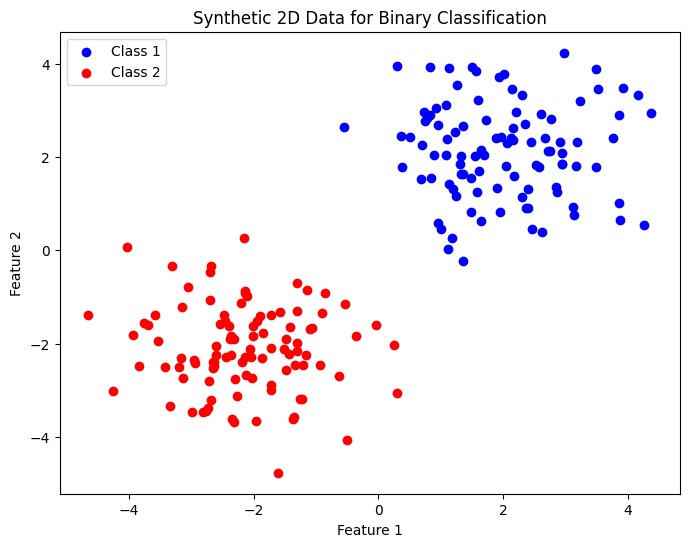

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)  # For reproducibility
n_samples = 100  # Number of samples per class

# Class 1: Gaussian distributed data with mean = [2, 2], covariance matrix = [[1, 0], [0, 1]]
mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, n_samples)

# Class 2: Gaussian distributed data with mean = [-2, -2], covariance matrix = [[1, 0], [0, 1]]
mean2 = [-2, -2]
cov2 = [[1, 0], [0, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# Labels: 0 for class 1, 1 for class 2
labels1 = np.zeros(n_samples)
labels2 = np.ones(n_samples)


# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Class 1')
plt.scatter(data2[:, 0], data2[:, 1], color='red', label='Class 2')
plt.title('Synthetic 2D Data for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class LinearClassifier(nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()
        # Define a single linear layer
        self.linear = nn.Linear(2, 1)  # 2 input features, 1 output feature

    def forward(self, x):
        x = self.linear(x)
        return torch.sigmoid(x)  # Apply sigmoid activation function for binary classification

# Initialize the model
model = LinearClassifier()

# Print the model structure
print(model)

LinearClassifier(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [ ]:
#Training data
X = torch.tensor(np.vstack((data1, data2)), dtype = torch.float)
y = torch.reshape(torch.tensor(np.hstack((labels1, labels2)), dtype = torch.float), (2 * n_samples, 1))

In [ ]:
criterion = nn.BCELoss()  # Binary cross-entropy loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass: Compute predicted y by passing X to the model
    y_pred = model(X)
    # Compute loss
    loss = criterion(y_pred, y)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.7387799024581909
Epoch 10, Loss: 0.5670920610427856
Epoch 20, Loss: 0.45204460620880127
Epoch 30, Loss: 0.3723253607749939
Epoch 40, Loss: 0.31501853466033936
Epoch 50, Loss: 0.27238428592681885
Epoch 60, Loss: 0.23969212174415588
Epoch 70, Loss: 0.21396180987358093
Epoch 80, Loss: 0.1932542473077774
Epoch 90, Loss: 0.17626766860485077


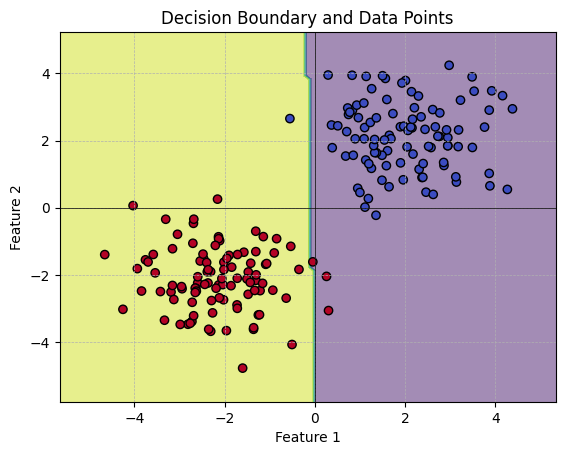

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

model.eval()  # Set the model to evaluation mode

# Predict classes for each point in the mesh grid
# Forward pass to get outputs. No need to track gradients here.
with torch.no_grad():
    Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
    Z = Z.reshape(xx.shape)
    Z = (Z > 0.5).float()  # Adjust the threshold as necessary

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Data Points')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='k', linewidth=0.5)  # Add x-axis
plt.axvline(x=0, color='k', linewidth=0.5)  # Add y-axis

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model.eval()

n_samples = 30

# Class 1: Gaussian distributed data with mean = [2, 2], covariance matrix = [[1, 0], [0, 1]]
mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]  # Diagonal covariance
data1 = np.random.multivariate_normal(mean1, cov1, n_samples)

# Class 2: Gaussian distributed data with mean = [-2, -2], covariance matrix = [[1, 0], [0, 1]]
mean2 = [-2, -2]
cov2 = [[1, 0], [0, 1]]  # Diagonal covariance
data2 = np.random.multivariate_normal(mean2, cov2, n_samples)

labels1 = np.zeros(n_samples)
labels2 = np.ones(n_samples)


X_test_tensor = torch.tensor(np.vstack((data1, data2)), dtype = torch.float)
y_test_tensor = torch.reshape(torch.tensor(np.hstack((labels1, labels2)), dtype = torch.float), (2 * n_samples, 1))

# Forward pass to get outputs. No need to track gradients here.
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)

# Convert predictions to binary outcomes
y_pred = (y_pred_tensor.squeeze() > 0.5).numpy()  # Adjust the threshold as necessary
y_true = y_test_tensor.numpy()

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc_roc = roc_auc_score(y_true, y_pred_tensor.squeeze().numpy())


print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')

Accuracy: 0.9833
Precision: 1.0000
Recall: 0.9667
F1 Score: 0.9831
AUC-ROC: 0.9967


In [ ]:
for name, param in model.named_parameters():
      print(f'{name}: {param}')

linear.weight: Parameter containing:
tensor([[-1.0094, -0.0176]], requires_grad=True)
linear.bias: Parameter containing:
tensor([-0.0924], requires_grad=True)
